# DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

### HELPER FUNCTION FOR PLOTTING

In [2]:
def plot_scatterplots(df, columns, x_label):
    """Plot scatterplots of the given columns against the x_label.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame to plot.
    columns : list
        The columns to plot.
    x_label : str
        The column to plot on the x-axis.
        """
    nb_rows = len(columns)
    height = 4 * nb_rows
    fig, axes = plt.subplots(nb_rows, 2, figsize=(16, height))
    colors = ['royalblue', 'dodgerblue', 'cornflowerblue', 'skyblue', 'lightsteelblue', 'lightblue', 'lightskyblue', 'powderblue']
    i = 0 

    for column in columns:
        x_label_fmt = x_label.replace('_', ' ').title()
        y_label_fmt = column.replace('_', ' ').title()

        axes = axes.flatten()
        ax1 = axes[i//2*2]
        sns.scatterplot(x=df[x_label], y=df[column], color=colors[i//2], alpha=0.5, ax=ax1)
        sns.regplot(x=df[x_label], y=df[column], color=colors[i//2], scatter=True, ax=ax1)
        ax1.set_xlabel(x_label_fmt, fontsize=8)
        ax1.set_ylabel(y_label_fmt, fontsize=8)
        ax1.set_title(f'{y_label_fmt} as a Function of {x_label_fmt} in Linear Scale', fontsize=9)
        ax1.set_xscale('linear')
        ax1.set_yscale('linear')
        
        ax2 = axes[i//2*2+(i+1)%2]
        sns.scatterplot(x=df[x_label], y=df[column], color=colors[i//2], alpha=0.5, ax=ax2)
        ax2.set_xlabel(x_label_fmt, fontsize=8)
        ax2.set_ylabel(y_label_fmt, fontsize=8)
        ax2.set_title(f'{y_label_fmt} as a Function of {x_label_fmt} in Log Scale', fontsize=9)
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        
        i += 2
    plt.tight_layout()
    plt.show()

In [3]:
def engagement_visu_pipeline(path, threshold=1e2):
    df = pd.read_parquet(path, engine='pyarrow')

    # Parse the date column to datetime
    df['created_at'] = pd.to_datetime(df['created_at'])
    display(df.head())

    # Split the dataset into two: one with impression_count >= threshold and one with impression_count < threshold
    # There is a significant difference in the distribution of the impression_count between the two datasets
    df_big = df[df["impression_count"] >= threshold]
    df_small = df[df["impression_count"] < threshold]
    print(f"Number of rows with impression_count >= {threshold}: {df_big.shape[0]}")
    print(f"Number of rows with impression_count < {threshold}: {df_small.shape[0]}")
    
    # Plot the scatterplots of the engagement counts against impression count
    columns = ['retweet_count', 'reply_count', 'like_count', 'quote_count']
    print("\033[1;34;5m" + f"Scatterplots of the engagement counts against impression count for impression_count < {threshold}" + "\033[0m")
    plot_scatterplots(df_small, columns, 'impression_count')

    print("\033[1;34;5m" + f"Scatterplots of the engagement counts against impression count for impression_count >= {threshold}" + "\033[0m")
    plot_scatterplots(df_big, columns, 'impression_count')

    # Plot the scatterplots of the impression counts against follower counts
    # Plot the scatterplots of the impression counts against follower counts
    columns = ['impression_count']
    print("\033[1;34;5m" + f"Scatterplots of the impression counts against follower count for impression_count < {threshold}" + "\033[0m")
    plot_scatterplots(df_small, columns, 'followers_count')

    print("\033[1;34;5m" + f"Scatterplots of the impression counts against follower count for impression_count >= {threshold}" + "\033[0m")
    plot_scatterplots(df_big, columns, 'followers_count')

## AMERICAN POLITICIANS

,author_id,id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count,following_count,tweet_count,listed_count
0,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97107,2211,6854,504
1,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97107,2211,6854,504
2,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97095,2211,6854,504
3,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97095,2211,6854,504
4,914815520842616834,1629304017087090689,2023-02-25 02:15:23+00:00,4,22,165,0,17557,97107,2211,6854,504


Number of rows with impression_count >= 100.0: 291680
Number of rows with impression_count < 100.0: 73922
Scatterplots of the engagement counts against impression count for impression_count < 100.0


/var/folders/dj/cqrjzx2j27x69jdjypm1q9y00000gn/T/ipykernel_10133/505883502.py:39: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2.set_yscale('log')


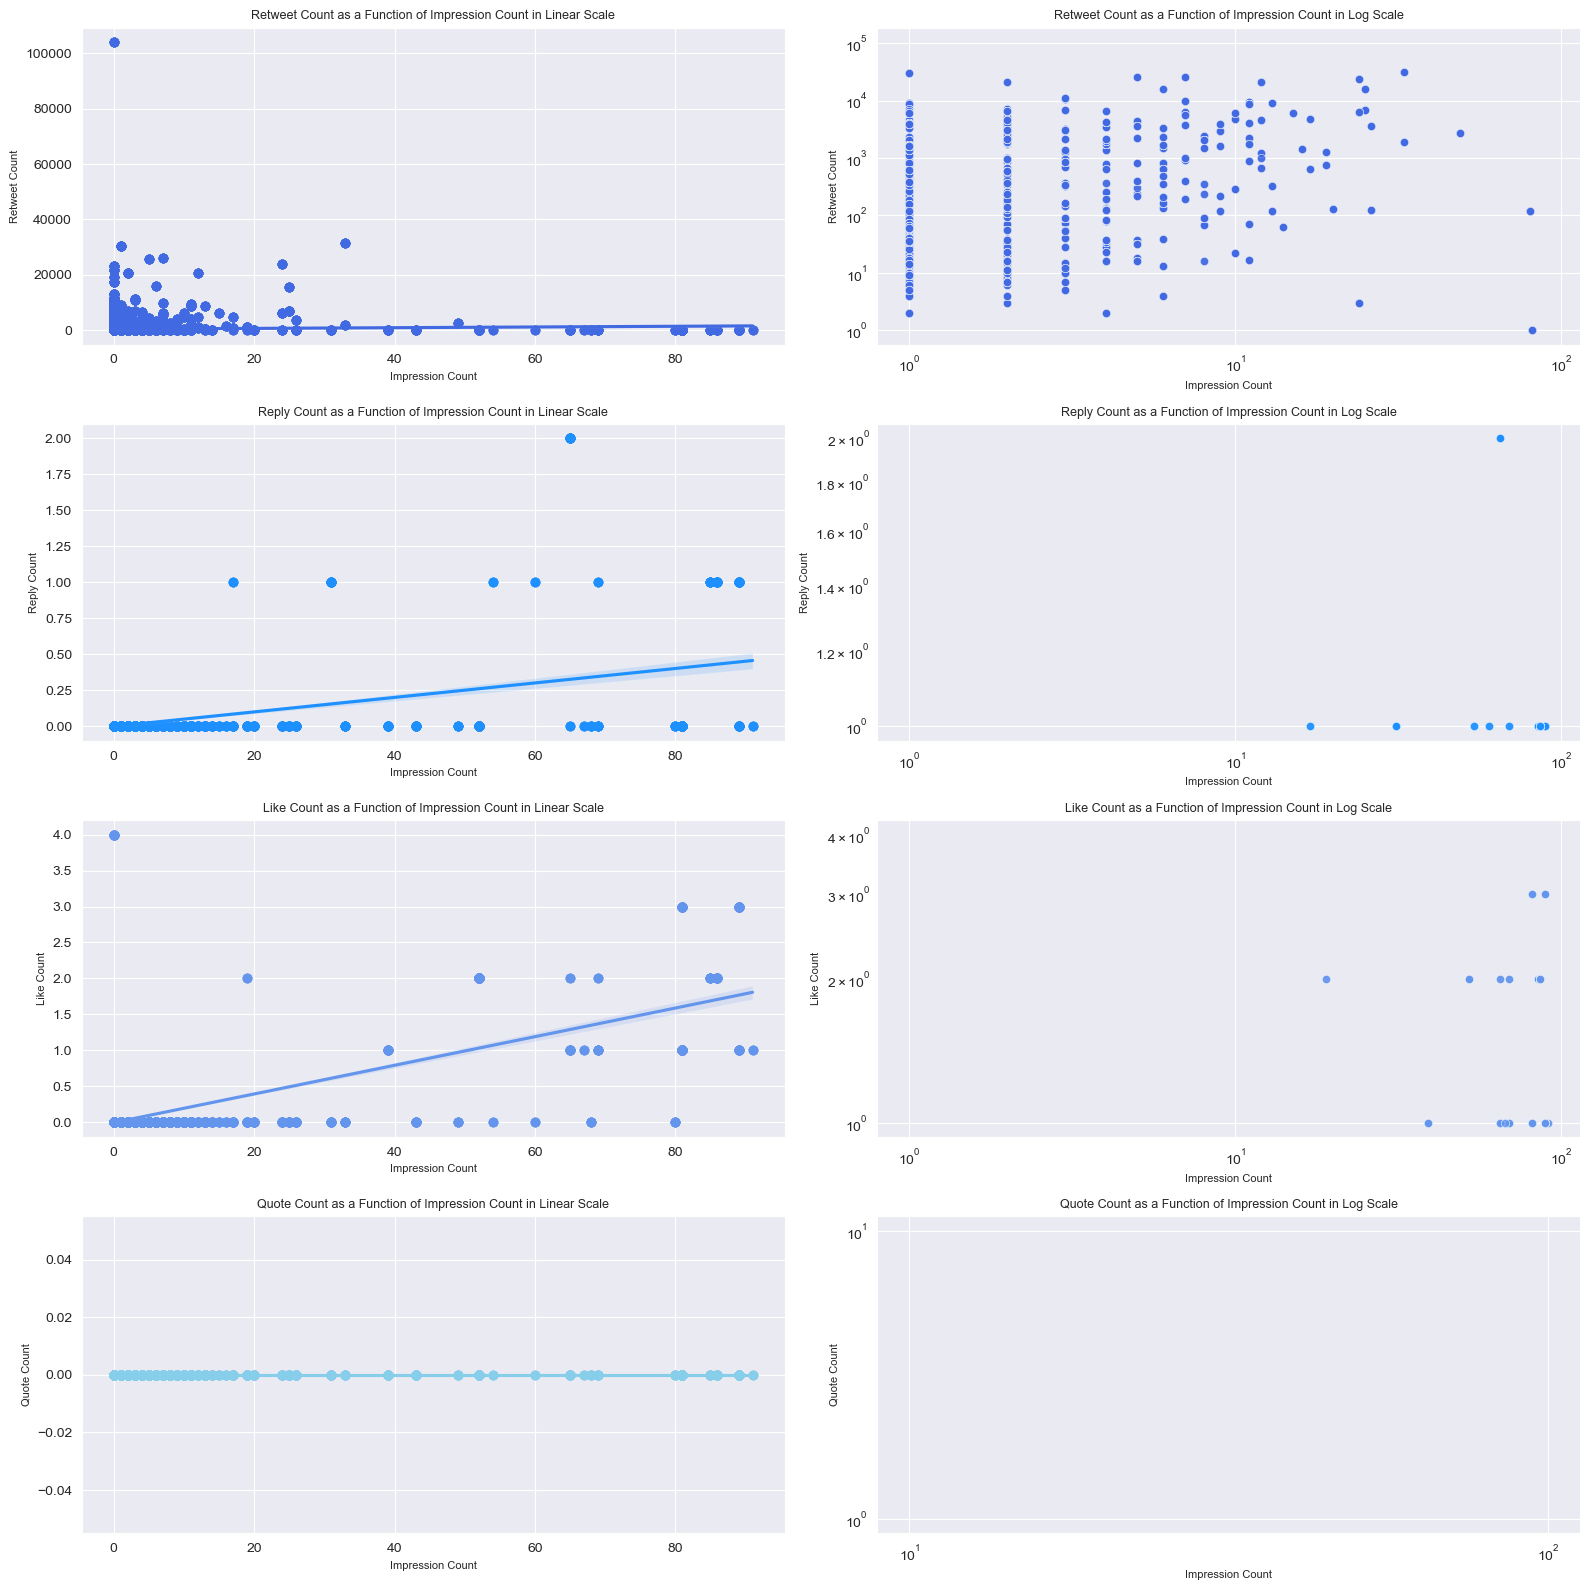

Scatterplots of the engagement counts against impression count for impression_count >= 100.0


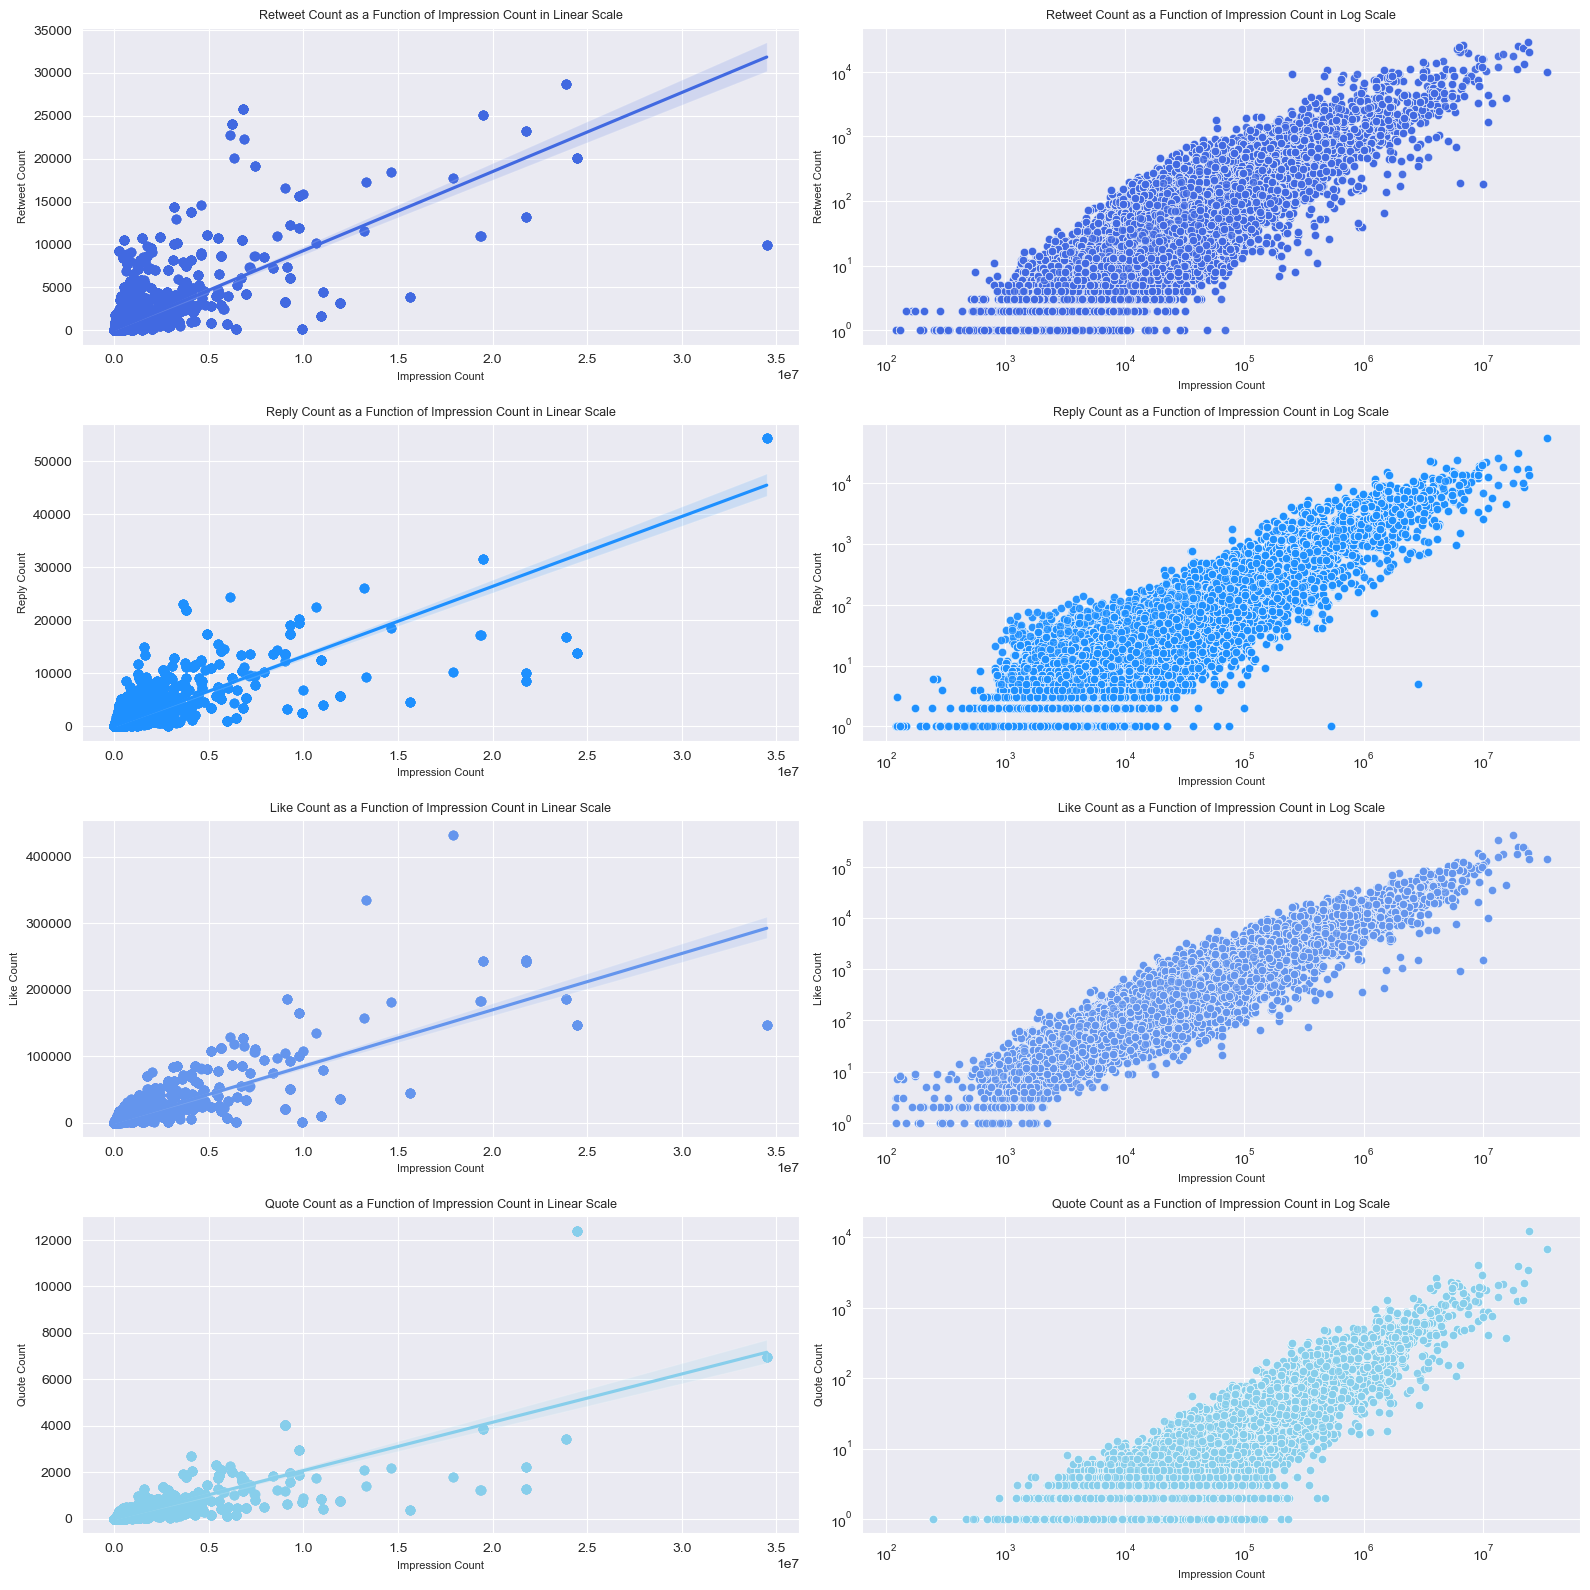

Scatterplots of the impression counts against follower count for impression_count < 100.0


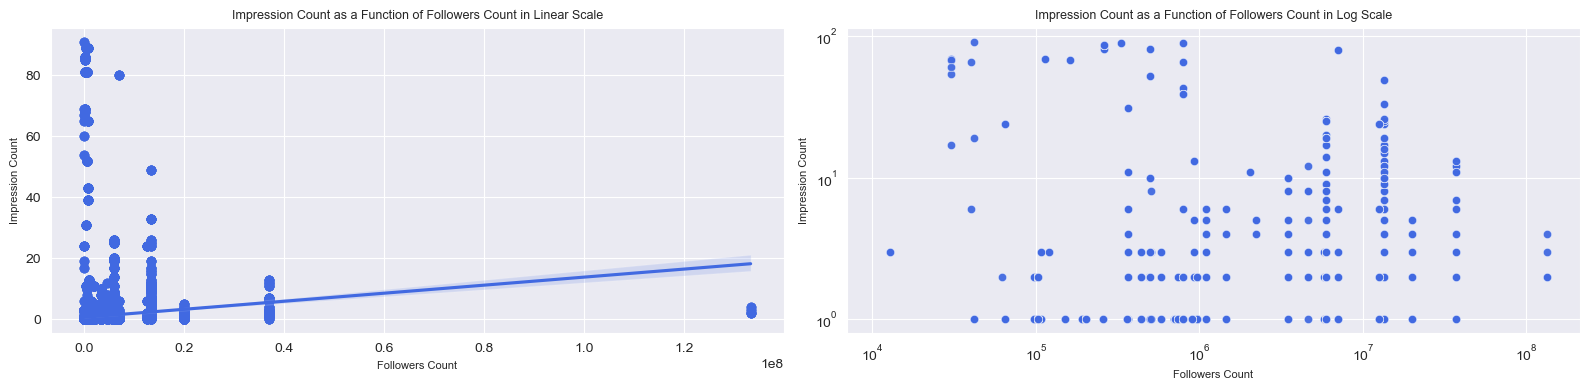

Scatterplots of the impression counts against follower count for impression_count >= 100.0


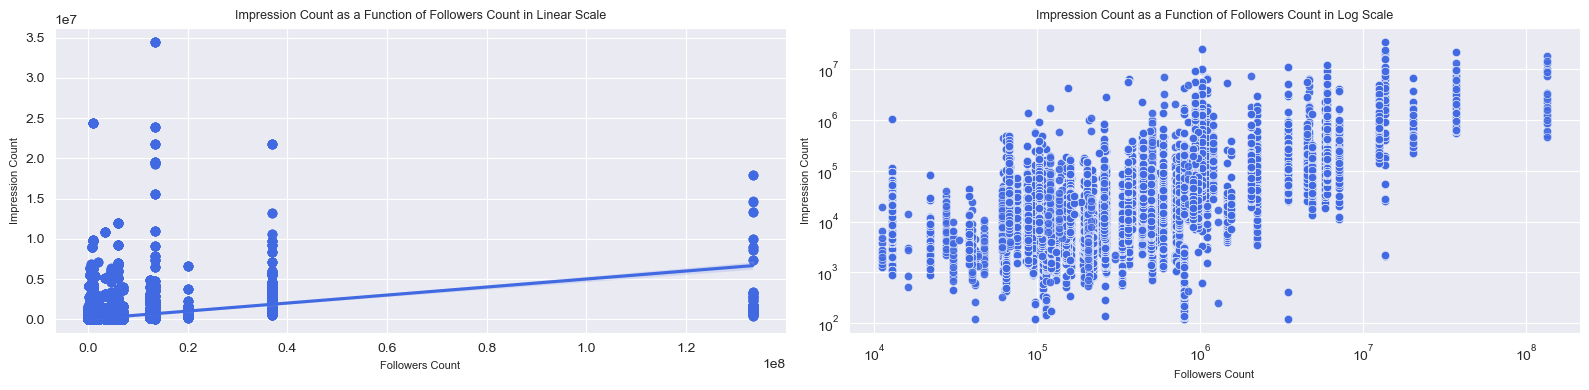

In [4]:
path_us_politicians = '../data/american_politicians/parquet/'

# Call the function to plot the scatterplots of the engagement metrics
engagement_visu_pipeline(path_us_politicians)

## AMERICAN CELEBRITIES

In [ ]:
path_us_celebrities = '../data/american_celebrities/parquet/'

# Call the function to plot the scatterplots of the engagement metrics
engagement_visu_pipeline(path_us_celebrities, threshold=1e2)

## FRENCH POLITICIANS

In [ ]:
path_french_celebrities = '../data/french_celebrities/parquet/'

# Call the function to plot the scatterplots of the engagement metrics
engagement_visu_pipeline(path_french_celebrities, threshold=1.5e1)

## FRENCH CELEBRITIES

In [ ]:
path_french_celebrities = '../data/french_celebrities/parquet/'

# Call the function to plot the scatterplots of the engagement metrics
engagement_visu_pipeline(path_french_celebrities, threshold=1.5e2)

### GET FEATURES FROM DATAFRAME

Tweet info:
- Tweet length  ✅
- Time of the tweet (morning, afternoon, night) ✅
- Sentiment of the tweet (score computed by model) ✅
- Number of hashtags ✅
- Number of mentions ✅
- Number of url's ✅
- Media type (video, image, text,..) => attention c un tableau
- (To clarify: location) 🚧

User info:
- Verified ✅
- Profile creation date ✅
- (To clarify: Tweet frequency) 🚧